1. Imprort modules

In [83]:
import pandas as pd
import numpy as np
import collections
import math
from sklearn.externals import joblib
import matplotlib.pyplot as plt

2. Load corpusdata

In [96]:
corpus_df = joblib.load("testcorpus_2.pkl")

3. Direct Speech over attribute

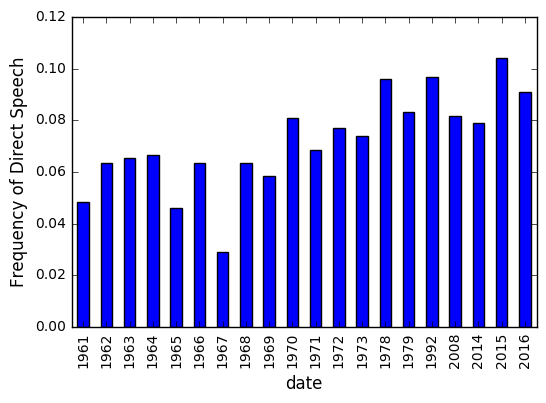

In [97]:
## choose an attribute
attribute = "date"
## freqs length tuple
freqs_len = list()
## dict of selection conditions
att_selection = dict()

for meta_row in corpus_df.itertuples():
    
    ds_freq = np.count_nonzero(meta_row.ds_speak)
   
    num_tokens = len(meta_row.ds_speak)
    
    freq_len = (ds_freq,num_tokens)
    
    if getattr(meta_row, attribute) in att_selection:
        
        att_selection[getattr(meta_row, attribute)] = ((att_selection[getattr(meta_row, attribute)][0]+
                                             ds_freq,att_selection[getattr(meta_row, attribute)][1]+num_tokens)) 
    else:
        
        att_selection[getattr(meta_row, attribute)] = freq_len
    


plotpd = pd.DataFrame.from_dict(att_selection,orient="index").sort_index()

plotpd[2] =  (plotpd[0] / plotpd[1])
freq_plot = plotpd[2].plot(kind='bar')
freq_plot.set_xlabel(attribute, fontsize=12)
freq_plot.set_ylabel("Frequency of Direct Speech", fontsize=12)
plt.show()

2. Average distribution of direct speech

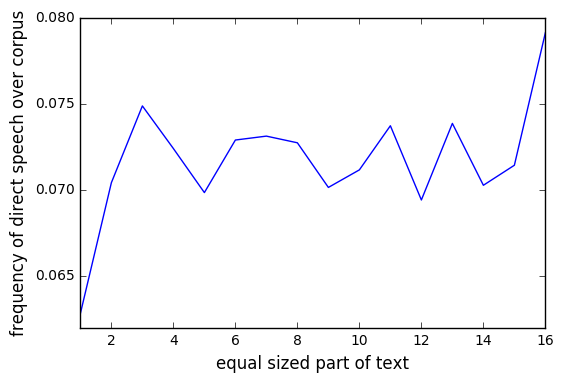

In [111]:
parts = 16
valuelist = list()

for meta_row in corpus_df.itertuples():
    
    
    
    parts_ds_speak = np.array_split(meta_row.ds_speak,parts,axis=0)
    
    
    valuelist.append(meta_row.ID)
    for part_ds_speak in parts_ds_speak:
    
        ds_value = np.count_nonzero(part_ds_speak)
        valuelist.append(ds_value/len(part_ds_speak))
    

    
plot_df = pd.DataFrame(np.array(valuelist).reshape(len(corpus_df),parts+1))

plot_df = pd.DataFrame.mean(plot_df.iloc[:,1:])


dist_plot = plot_df.plot(kind="line")
dist_plot.set_xlabel("equal sized part of text", fontsize=12)
dist_plot.set_ylabel("frequency of direct speech over corpus", fontsize=12)
plt.show()